In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import attrgetter
import seaborn as sns
import matplotlib.colors as mcolors

In [2]:
#Loading the dataset and creating an object data where it is stored.
data=pd.read_excel('Online Retail.xlsx')

In [3]:
#shape of our dataset
print("The shape of our dataset is: ", data.shape)

The shape of our dataset is:  (541909, 8)


In [4]:
#check the head of the dataset
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
#Checking for duplicates in the dataset
data.duplicated().sum()

5268

We can see above that we have 5268 duplicated records in our dataset.So we will drop them and move further.

In [6]:
#Removing the duplicate records.
data=data[~data.duplicated()]

In [7]:
#Checking the shape of the dataset again after dropping the duplicates.
print("The shape of our dataset after dropping duplicates is: ", data.shape)

The shape of our dataset after dropping duplicates is:  (536641, 8)


In [8]:
#Getting the information about the rows and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      536641 non-null object
StockCode      536641 non-null object
Description    535187 non-null object
Quantity       536641 non-null int64
InvoiceDate    536641 non-null datetime64[ns]
UnitPrice      536641 non-null float64
CustomerID     401604 non-null float64
Country        536641 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


Our new dataset is composed of **536641** rows and **8** columns. When going through the columns, we notice that we have some missing values in the **CustomerID** column, as it only has **401604** values. Also the column **Description** has missing values. So, that should be considered when applying exploration to our dataset.

In [9]:
#exploring the unique values of each attribute
print("Number of transactions: ", data['InvoiceNo'].nunique())
print("Number of products bought: ",data['StockCode'].nunique())
print("Number of customers:", data['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(data['CustomerID'].isnull().sum() * 100 / len(data),2),"%" )
print('Number of countries: ',data['Country'].nunique())

Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Percentage of customers NA:  25.16 %
Number of countries:  38


**Note:** The number of NA customers is quite large and that would impact the results.

This dataframe contains 8 variables that correspond to:

**InvoiceNo**: Invoice number. ***Nominal***, a 6-digit integral number uniquely assigned to each transaction. **If this code starts with letter 'c', it indicates a cancellation.** <br>
**StockCode**: Product (item) code. ***Nominal***, a 5-digit integral number uniquely assigned to each distinct product. <br>
**Description**: Product (item) name. ***Nominal***. <br>
**Quantity**: The quantities of each product (item) per transaction. ***Numeric***.<br> 
**InvoiceDate**: Invoice Date and time. ***Numeric***, the day and time when each transaction was generated. <br>
**UnitPrice**: Unit price. ***Numeric***, Product price per unit in sterling. <br>
**CustomerID**: Customer number. ***Nominal***, a 5-digit integral number uniquely assigned to each customer. <br>
**Country**: Country name. ***Nominal***, the name of the country where each customer resides.<br>

Now, let's have an idea about the quantitative data (Quantity & UnitPrice).

In [10]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


1. The min and max value for Quantity is 80995,this could represent cancelled or returned orders.
2. The UnitPrice also have few negative values which is uncommon,these transactions could represent cancelled orders by            customers or bad-debt incurred by the business.
3. Bad debt adjustments will be dropped from the dataset as these do not represent actual sales.

### Analyzing Data Quality Issues

In [11]:
#Number of Unique Items in StockCode Column
data.StockCode.nunique()

4070

In [12]:
#Number of Unique Items Description Column
data.Description.nunique()

4223

We can see from above that descriptions are more than the number of stock code so there must be some stock code that has more than one description.

In [13]:
stck_des=data.groupby(['StockCode','Description']).count().reset_index()

Stocks which have more than one description

In [14]:
stck_des.StockCode.value_counts()[stck_des.StockCode.value_counts()>1].reset_index().head()

,index,StockCode
0,20713,8
1,23084,7
2,85175,6
3,21830,6
4,23131,5


These are the index which tells gives us the information about the stock code that have multiple descriptions.

**Now we will look at the cancelled Invoices.**

As mentioned in the description of the dataset, some InvoiceNo start with the letter "c" = cancelled. Let's see if our hypothesis is correct about the negative quantity: **-80995**. <br>
We will look for the list of cancelled invoices and check if there is an invoice with that quantity.

In [15]:
#getting cancelled transactions
cancelled_df=data[data['InvoiceNo'].astype(str).str.contains('C')]
cancelled_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


**Question: How many cancelled orders do we have? Also what is the percentage of cancelled orders in the total orders?**

In [16]:
#Number of cancelled Orders
print("Number of cancelled Orders:",len(cancelled_df))
#Percentage
total_orders = data['InvoiceNo'].nunique()
cancelled_number = len(cancelled_df)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

Number of cancelled Orders: 9251
Percentage of orders canceled: 9251/25900 (35.72%) 


**What is the average number of orders per customers?**

In [17]:
customers=pd.DataFrame(data.groupby(['CustomerID'])['InvoiceNo'].nunique())
customers.describe()

,InvoiceNo
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


Here we can see that average number of orders per customer is 5.

**What is the average number of unique items per order?**

In [18]:
invoice = pd.DataFrame(data.groupby('InvoiceNo')['StockCode'].nunique())
invoice.columns=['productsNumber']
invoice.describe()

,productsNumber
count,25900.000000
mean,20.510618
std,42.500488
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1110.000000


Here we can see that average number of unique items per order is 20.

**Customers by Country**

In [19]:
data['Total_Cost']=data['Quantity']*data['UnitPrice']

**What is the total revenue per country?**

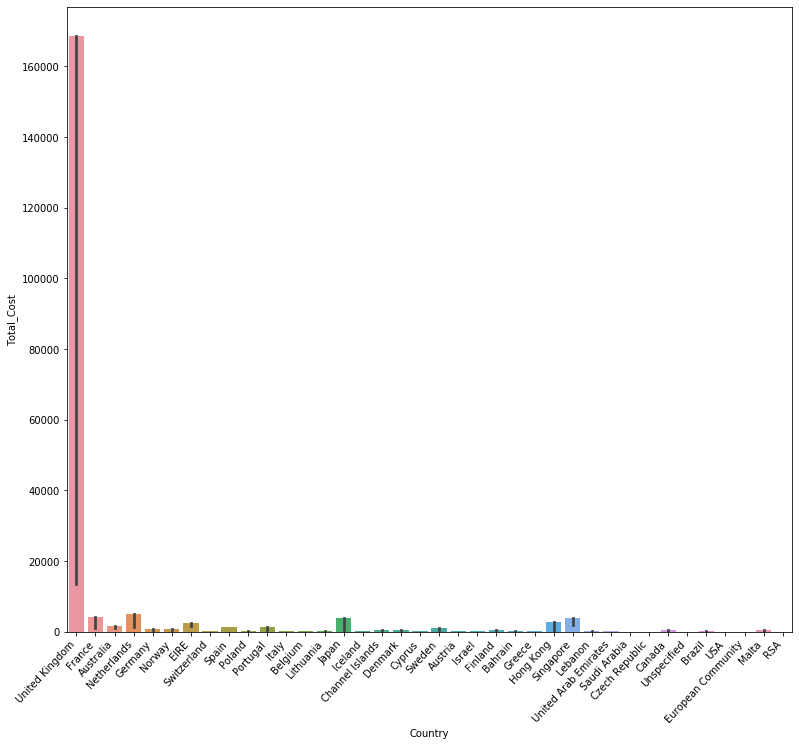

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='Total_Cost',data=data,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

In [21]:
data.groupby('Country').sum().sort_values(by='Total_Cost', ascending=False)

,Quantity,UnitPrice,CustomerID,Total_Cost
Country,,,,
United Kingdom,4250328,2.233248e+06,5.544907e+09,8.167128e+06
Netherlands,200128,6.492550e+03,3.419054e+07,2.846615e+05
EIRE,142495,4.840037e+04,1.102464e+08,2.629934e+05
Germany,117341,3.763344e+04,1.198819e+08,2.215095e+05
France,110438,4.298598e+04,1.074419e+08,1.973171e+05
Australia,83643,4.048000e+03,1.568057e+07,1.370098e+05
Switzerland,30313,6.795590e+03,2.377592e+07,5.636305e+04
Spain,26817,1.262150e+04,3.262673e+07,5.475603e+04
Belgium,23152,7.540130e+03,2.571829e+07,4.091096e+04


In [22]:
data[data['Country']=='United Kingdom']['CustomerID'].nunique()

3950

So, we can conclude not only most sales revenues are achieved in the UK, but also most customers are located there too. We can explore this to find more about what products the customers buy together and what possible future opportunities in the UK Market.

**Exploring What are the Products that are most bought in UK?**

In [23]:
products=data.groupby('StockCode',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
products.head(10)

,StockCode,Quantity
1070,22197,56427
2622,84077,53751
3659,85099B,47260
3670,85123A,38811
2735,84879,36122
377,21212,36016
1905,23084,30597
1335,22492,26437
1453,22616,26299
889,21977,24719


I think it's important to know more about these most bought products. Is there any products that when one of them is bought, the other is bought too? When do customers buy most? At what period? 
To get an answer we will do "**Market Basket Analysis**" to find association rules between products.<br>
Before moving forward with the **RFM Analysis** we will do Cohort Analysis.


**Cohort**

A cohort is a group of users sharing a particular characteristic. Strictly speaking it can be any characteristic, but typically the term cohort refers to a time-dependent grouping. For example, a typical cohort groups users by the week or month when they were first acquired. When speaking of groupings that are not time-dependent, the term segment is typically used instead of cohort.

**Cohort Analysis**

Cohort analysis refers to tracking and investigating the performance of cohorts over time. For example, if you wanted to see if users you’re acquiring now are more or less valuable than users you’ve acquired in the past, you can define cohorts by the month when they were first acquired. You can then run a cohort analysis to compare year-over-year revenue performance. You can also use cohort Analysis to group users/Customers.

**For Time Cohort Analysis we will use**

**Date Time Column** <br>
**Price Column** <br>
**Customer ID Column** <br>

In [24]:
#For calculation Recency and Frequency we will drop the rows which have negative values in the Quantity Column.
df=data[data['Quantity']>0]

In [25]:
#Checking for null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133322
Country             0
Total_Cost          0
dtype: int64

Dropping the negative values from CustomerID column as we have to cohort(segment) customers based on their ID.

In [26]:
df= df[np.isfinite(df['CustomerID'])]

In [27]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Total_Cost     0
dtype: int64

In [28]:
#Getting the minimum and maximum dates for which we have the data for
print('Min:{}; Max:{}'.format(min(df.InvoiceDate),max(df.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


## Cohort Analysis : Retention Rate

Customer retention will cause less cost against aquiring new customers, So we will focus on retaining old customers hence we are calculating retention rate.

**Effective strategies**

1. Communication calender
2. Customer loyalty program
3. Customer relationship management
4. Beneficial customers after purchase(feedback from customer).

In [29]:
#We need only the year and month from the Invoice Date Column because we are looking at the behaviour of customers on a 
#monthly basis.
df['InvoiceMonth']=df['InvoiceDate'].apply(lambda x:x.strftime("%Y-%m"))
df['InvoiceMonth']=pd.to_datetime(df['InvoiceMonth'])
df[['CustomerID','InvoiceMonth']]

,CustomerID,InvoiceMonth
0,17850.0,2010-12-01
1,17850.0,2010-12-01
2,17850.0,2010-12-01
3,17850.0,2010-12-01
4,17850.0,2010-12-01
...,...,...
541904,12680.0,2011-12-01
541905,12680.0,2011-12-01
541906,12680.0,2011-12-01
541907,12680.0,2011-12-01


In [30]:
# create two variables: month of order and cohort
df['order_month'] = df['InvoiceDate'].dt.to_period('M')
df['cohort'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

In [31]:
# add an indicator for periods (months since first purchase)
df_cohort = df.groupby(['cohort', 'order_month']).agg(n_customers=('CustomerID', 'nunique')).reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [32]:
# pivot the data into a form of the matrix
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [33]:
# divide by the cohort size (month 0) to obtain retention as %
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

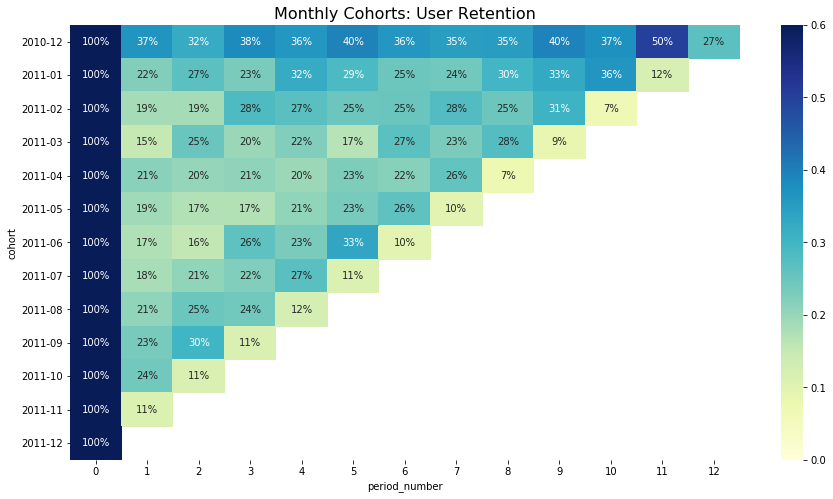

In [34]:
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(retention_matrix,annot=True,fmt= '.0%',cmap='YlGnBu', vmin = 0 , vmax =0.6)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
ax.set_title('Monthly Cohorts: User Retention',fontsize=16);

**The retention Rate dataframe represent Customer retained across Cohurts. We can read it as following:**
- Index value represents the Cohort.
- Columns represent the number of months since current Cohort.
- For example the value at index 2010-12-01 column 7 is 35 and Represents 35% of customers from cohort 2010-12 were       retained in 7th Month.

**Also you can see from the retention Rate DataFrame:**

- Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customers signed up in 1st Month.
- Retention Rate may increase or decrease in Subsequent Indexes.
- Values towards BottomRight have a lot of NaN values.


The Cohort Indexes towards right represent Number of Months away the Values are from the Current Cohort. Thus the values at Bottom Right cells don't have data of acquisition as they are too recent.


## Recency Frequency Monetary Analysis

In ecommerce companies like online retails, customer segmentation is necessary in order to understand customers behaviors. It leverages aqcuired customer data like the one we have in our case, **transactions data** in order to divide customers into groups. 

Our goal in this Notebook is to cluster our customers to get insights in:
- Increasing **revenue** (Knowing customers who present most of our revenue)
- Increasing customer **retention**
- Discovering **Trends and patterns** 
- Defining **customers at risk**

We will do **RFM Analysis** as a first step and then **combine RFM with predictive algorithms (k-means)**. 

RFM Analysis answers these questions:
- Who are our best customers?
- Who has the potential to be converted in more profitable customers?
- Which customers we must retain?
- Which group of customers is most likely to respond to our current campaign?

# What is RFM?

**Behavioral segmentation by 3 important features:**
- Recency — number of days since the last purchase
- Frequency — number of transactions made over a given period
- Monetary — amount spent over a given period of time

**We will then have to group these features by:**
- Percentiles or quantiles
- Pareto Rule — 80/20
- Business Acumen

**Recency**

To calculate recency, we need to choose a date point from which we evaluate **how many days ago was the customer's last purchase**.

**Frequency**

Frequency helps us to know **how many times a customer purchased from us**. To do that we need to check how many invoices are registered by the same customer.

**Monetary**

Monetary attribute answers the question: **How much money did the customer spent over time?**

To do that, first, we will create a new column total cost to have the total price per invoice.

In [35]:
#Calculate recency 
Max_Date = dt.datetime(2011,12,10)

In [36]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Max_Date - x.max()).days, 'InvoiceNo': lambda x: len(x),'Total_Cost': lambda x: x.sum()})
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency',
                       'Total_Cost': 'MonetaryValue'}, inplace=True)

In [37]:
rfm.head(10)

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
12353.0,204,4,89.00
12354.0,232,58,1079.40
12355.0,214,13,459.40


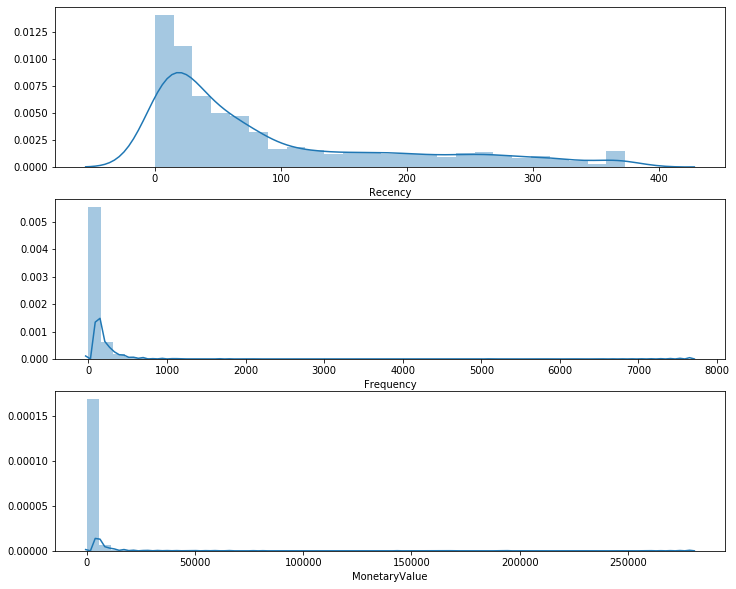

In [38]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(rfm['MonetaryValue'])
# Show the plot
plt.show()

This plot provides us with some very interesting insights and how skewed our data is. The important thing to take note here is that we will be grouping these values in quantiles. However, when we examine our customer segmentation using K-Means in the next, it will be very important to ensure that we scale our data to center the mean and standard deviations.

**Applying the 80-20 Rule**

Before moving to customer segments, Let's see the application of Pareto Principle – commonly referred to as the 80-20 rule on our dataset by applying it to our RFM variables.

Pareto’s rule says **80% of the results come from 20% of the causes**.

Similarly, **20% customers contribute to 80% of your total revenue**. Let's verify that because that will help us know which customers to focus on when marketing new products.

In [39]:
#get the 80% of the revenue
pareto_cutoff = rfm['MonetaryValue'].sum() * 0.8
print("The 80% of total revenue is: ",round(pareto_cutoff,2))

The 80% of total revenue is:  7109767.12


In [40]:
customers_rank = rfm
# Create a new column that is the rank of the value of coverage in ascending order
customers_rank['Rank'] = customers_rank['MonetaryValue'].rank(ascending=0)
#customers_rank.drop('RevenueRank',axis=1,inplace=True)
customers_rank.head()

,Recency,Frequency,MonetaryValue,Rank
CustomerID,,,,
12346.0,325,1,77183.60,10.0
12347.0,2,182,4310.00,335.0
12348.0,75,31,1797.24,1004.0
12349.0,18,73,1757.55,1027.0
12350.0,310,17,334.40,3097.0


**Top Customers**

In [41]:
customers_rank.sort_values('Rank',ascending=True)

,Recency,Frequency,MonetaryValue,Rank
CustomerID,,,,
14646.0,1,2080,280206.02,1.0
18102.0,0,431,259657.30,2.0
17450.0,8,336,194390.79,3.0
16446.0,0,3,168472.50,4.0
14911.0,1,5672,143711.17,5.0
...,...,...,...,...
17956.0,249,1,12.75,4335.0
16454.0,44,2,6.90,4336.0
14792.0,63,2,6.20,4337.0


In [42]:
#get top 20% of the customers
top_20 = 4339 *20 /100
top_20

867.8

In [43]:
#sum the monetary values over the customer with rank <=868
revenueTop20 = customers_rank[customers_rank['Rank'] <= 868]['MonetaryValue'].sum()
revenueTop20

6637300.821

The total revenue generatedby Top 20 customers is approx 75% of the total revenue but it does not strictly follow the Pareto Rule for 80% but it is actually very close to it. Also we can say that these Top 20 customers account for most of the revenue of the company.

**Applying RFM Score Formula**

In [44]:
# --Calculate R and F groups--
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
# Create new columns R and F 
rfm = rfm.assign(R = r_groups.values, F = f_groups.values)
rfm.head()

,Recency,Frequency,MonetaryValue,Rank,R,F
CustomerID,,,,,,
12346.0,325,1,77183.60,10.0,1,1
12347.0,2,182,4310.00,335.0,4,4
12348.0,75,31,1797.24,1004.0,2,2
12349.0,18,73,1757.55,1027.0,3,3
12350.0,310,17,334.40,3097.0,1,1


In [45]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(rfm['MonetaryValue'], q=4, labels=m_labels)
# Create new column M
rfm = rfm.assign(M = m_groups.values)

In [46]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Score'] = rfm.apply(join_rfm, axis=1)
rfm = rfm
rfm.head()

,Recency,Frequency,MonetaryValue,Rank,R,F,M,RFM_Score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,10.0,1,1,4,114
12347.0,2,182,4310.00,335.0,4,4,4,444
12348.0,75,31,1797.24,1004.0,2,2,4,224
12349.0,18,73,1757.55,1027.0,3,3,4,334
12350.0,310,17,334.40,3097.0,1,1,2,112


Best Recency score = 4: most recently purchase.
Best Frequency score = 4: most quantity purchase.
Best Monetary score = 4: spent the most.

Let's see who are our **Champions** (best customers).

In [47]:
# Calculate RFM_Score
rfm['RFM_Total_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Total_Score'].head())

CustomerID
12346.0     6.0
12347.0    12.0
12348.0     8.0
12349.0    10.0
12350.0     4.0
Name: RFM_Total_Score, dtype: float64


In [48]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Total_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Total_Score'] >= 8) and (df['RFM_Total_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Total_Score'] >= 7) and (df['RFM_Total_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Total_Score'] >= 6) and (df['RFM_Total_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Total_Score'] >= 5) and (df['RFM_Total_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Total_Score'] >= 4) and (df['RFM_Total_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'


In [49]:
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,MonetaryValue,Rank,R,F,M,RFM_Score,RFM_Total_Score,RFM_Level
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,10.0,1,1,4,114,6.0,Potential
12347.0,2,182,4310.00,335.0,4,4,4,444,12.0,Can't Loose Them
12348.0,75,31,1797.24,1004.0,2,2,4,224,8.0,Champions
12349.0,18,73,1757.55,1027.0,3,3,4,334,10.0,Can't Loose Them
12350.0,310,17,334.40,3097.0,1,1,2,112,4.0,Needs Attention


In [50]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can't Loose Them      25.9     189.8        4407.3  1671
Champions             63.2      56.2         987.3   459
Loyal                 79.6      38.2         762.0   457
Needs Attention      176.0      13.6         239.6   391
Potential             95.1      27.9         818.2   461
Promising            151.9      21.1         366.8   519
Require Activation   260.2       8.2         157.4   381


- From here, we can see that a large percentage (~60%) of our customers are in the top tier RFM levels. The store must be doing something right to be maintaining their loyalty and in return the store should be award them by gifting some vouchers or gift cards.<br>

 The other 40% will need some work. Let’s explore using some ads to re-target them:<br>

- Potential — high potential to enter our loyal customer segments, why not throw in some freebies on their next purchase to show that you value them!
- Promising — showing promising signs with quantity and value of their purchase but it has been a while since they last bought sometime from you. Let’s target them with their wishlist items and a limited time offer discount.
- Needs Attention — made some initial purchase but have not seen them since. Was it a bad customer experience? Or product-market fit? Let’s spend some resource build our brand awareness with them.
- Require Activation — Poorest performers of our RFM model. They might have went with our competitors for now and will require  a different activation strategy to win them back.

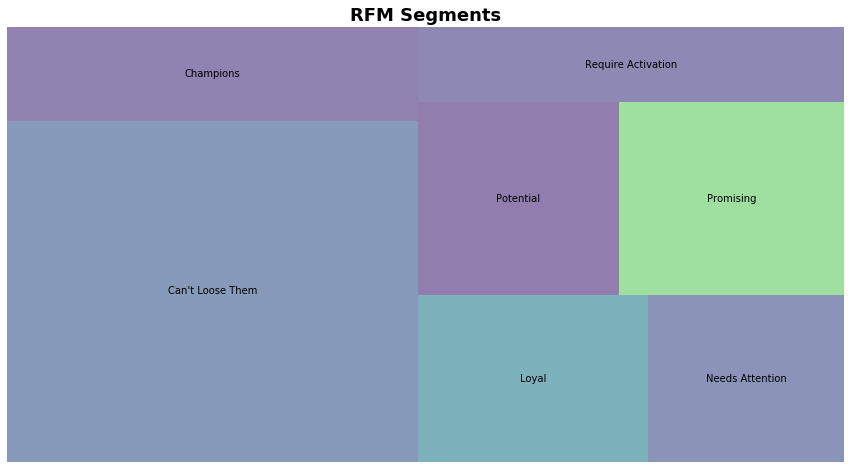

In [51]:
import squarify
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15,8)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

To gain even further insight into customer behavior, we can dig deeper in the relationship between RFM variables.

RFM model can be used in conjunction with certain predictive models like k-means clustering, Logistic Regression and Recommendation to produce better informative results on customer behavior.

We will go for k-means since it has been widely used for Market Segmentation and it offers the advantage of being simple to implement.

**K-Means Assumptions** <br>
These will be the 3 features that we are going to use to implement our K-Means model. Before we can fit the K-Means model to our data, we need to ensure that these key assumptions are fulfilled.
1. Distribution of variables
2. Variables with same average values
3. Variables with same variance

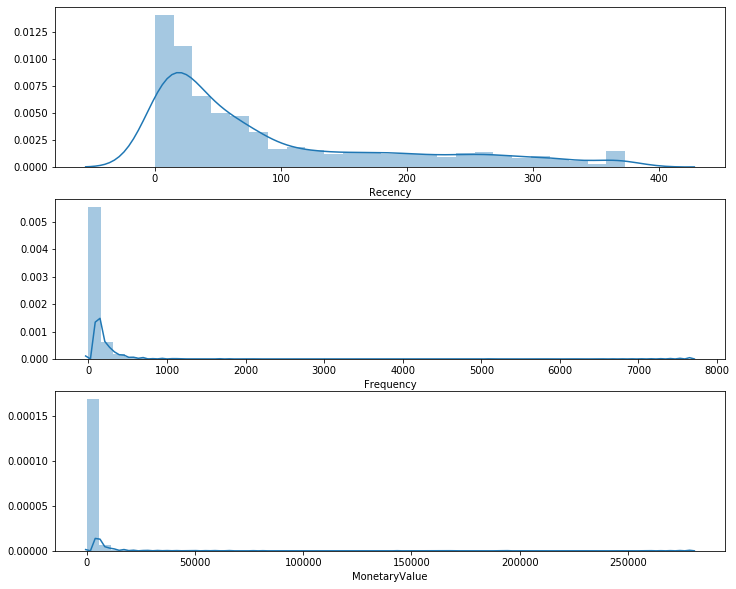

In [52]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(rfm['MonetaryValue'])
# Show the plot
plt.show()

We can see from the plots that Recency,Frequency and Monetary have skewness to the right.So we will apply log transformation to reduce the skewness.

In [139]:
customer_clusters=rfm.drop(['Rank','R','F','M','RFM_Score','RFM_Level','RFM_Total_Score'],axis=1)
customer_clusters.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [140]:
customer_clusters.reset_index(inplace=True)
customer_clusters.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [130]:
from pycaret.clustering import *

In [142]:
#creating setup
Clust = setup(customer_clusters, normalize = True,
              ignore_features=['CustomerID'],
                session_id = 123)


Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Original Data,"(4339, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(4339, 3)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [143]:
kmeans = create_model('kmeans')
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)


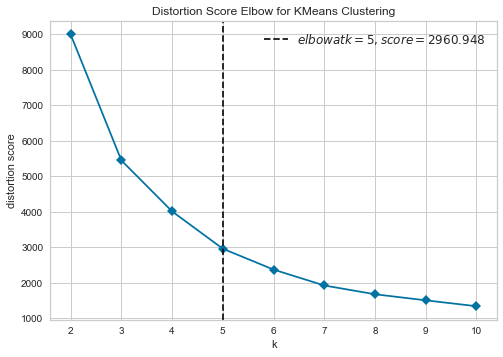

In [144]:
plot_model(kmeans, plot = 'elbow')

In [145]:
#Above model suggests that optimum number of clusters is 5 so we move forwad with it.
kmeans = create_model('kmeans', num_clusters=5)
print(kmeans)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)


In [146]:
kmean_results = assign_model(kmeans)
kmean_results

,CustomerID,Recency,Frequency,MonetaryValue,Cluster
0,12346.0,325,1,77183.60,Cluster 4
1,12347.0,2,182,4310.00,Cluster 1
2,12348.0,75,31,1797.24,Cluster 1
3,12349.0,18,73,1757.55,Cluster 1
4,12350.0,310,17,334.40,Cluster 0
...,...,...,...,...,...
4334,18280.0,277,10,180.60,Cluster 0
4335,18281.0,180,7,80.82,Cluster 0
4336,18282.0,7,12,178.05,Cluster 1
4337,18283.0,3,721,2045.53,Cluster 4


In [149]:
def Final_cluster_df(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'MonetaryValue': 'mean'
    }).round(0)
    
    return df_new
results= Final_cluster_df(kmean_results)
results

,Recency,Frequency,MonetaryValue
Cluster,,,
Cluster 0,249.0,27.0,489.0
Cluster 1,44.0,72.0,1328.0
Cluster 2,7.0,827.0,190809.0
Cluster 3,2.0,5718.0,70612.0
Cluster 4,16.0,474.0,11752.0


**Conclusion**

- **Cluster 3 and Cluster 4** belongs to the **Best Customers** as they have a high monetary value,also they have have made recent purchases also they are very frequent.
- **Cluster 5** belongs to the **Promising Customers** as they have a decent spent and they are more or less than frequent and visit almost regularly.We should focus on converting them to the Best Customers and for that we can improve our reccommendations and offers for them.
- **Cluster 1 and Cluster 2** belongs to **Low Customer Groups** who do not spend much and are less frequent and also they do not visit so frequently. So we should target them and give them some good offers so that we do not loose them.
- Also we should be very focused on the customers from Clusters 3 and 4 because they are more recent.